In [1]:
import numpy as np
import os
import sys
import pandas as pd
sys.path.append(os.path.abspath("D:/other_thesis/codes_latestversion/general/codes/"))
import functions_model #import python file containing the functions
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
#import pydot
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, mean_squared_error, mean_absolute_percentage_error
import geopandas as gpd
import warnings
import shap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import random
import math
import time
import seaborn as sns
from boruta import BorutaPy

import math
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, kendalltau
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

random.seed(1234) # Set random seed

In [2]:
time_train = gpd.read_file(r'D:\other_thesis\rf_model\files\df_train_time.geojson')
time_test = gpd.read_file(r'D:\other_thesis\rf_model\files\df_test_time.geojson')

geo_train = gpd.read_file(r'D:\other_thesis\rf_model\files\df_train_geo.geojson')
geo_test = gpd.read_file(r'D:\other_thesis\rf_model\files\df_test_geo.geojson')

random_train = gpd.read_file(r'D:\other_thesis\rf_model\files\df_train_random.geojson')
random_test = gpd.read_file(r'D:\other_thesis\rf_model\files\df_test_random.geojson')

In [3]:
Karnataka_shp = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\Karnataka_state_shp\State.shp')
Karnataka_shp.geometry = Karnataka_shp.geometry.to_crs(epsg = 4326) # Set crs to 4326

Karnataka_districts = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\District_2016\District_2016.shp')
Karnataka_districts.geometry = Karnataka_districts.geometry.to_crs(epsg = 4326) # Set crs to 4326

In [4]:
time_test_df = time_test.copy()
time_test_df['geometry_string'] = time_test_df['geometry'].astype(str)
time_test_df = time_test_df.join(time_test_df.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
time_test_df = time_test_df.join(time_test_df.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
time_test_df = time_test_df.join(time_test_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
time_test_df = time_test_df.join(time_test_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
time_test_df['Average Yield(Kg/Ha)_std'] = time_test_df['Average Yield(Kg/Ha)_std'].fillna(0)
time_test_df = time_test_df.join(time_test_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')

In [5]:
geo_test_df = geo_test.copy()

geo_test_2016 = geo_test[geo_test['Year'] == '2016-01-01T00:00:00'] #451
geo_test_2017 = geo_test[geo_test['Year'] == '2017-01-01T00:00:00'] #367
geo_test_2018 = geo_test[geo_test['Year'] == '2018-01-01T00:00:00'] #374

geo_test_df['geometry_string'] = geo_test_df['geometry'].astype(str)
geo_test_df = geo_test_df.join(geo_test_df.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_df = geo_test_df.join(geo_test_df.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_df = geo_test_df.join(geo_test_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_df = geo_test_df.join(geo_test_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
geo_test_df['Average Yield(Kg/Ha)_std'] = geo_test_df['Average Yield(Kg/Ha)_std'].fillna(0)
geo_test_df = geo_test_df.join(geo_test_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')

geo_test_2016['geometry_string'] = geo_test_2016['geometry'].astype(str)
geo_test_2016 = geo_test_2016.join(geo_test_2016.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_2016 = geo_test_2016.join(geo_test_2016.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_2016 = geo_test_2016.join(geo_test_2016.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_2016 = geo_test_2016.join(geo_test_2016.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
geo_test_2016['Average Yield(Kg/Ha)_std'] = geo_test_2016['Average Yield(Kg/Ha)_std'].fillna(0)
geo_test_2016 = geo_test_2016.join(geo_test_2016.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')

geo_test_2017['geometry_string'] = geo_test_2017['geometry'].astype(str)
geo_test_2017 = geo_test_2017.join(geo_test_2017.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_2017 = geo_test_2017.join(geo_test_2017.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_2017 = geo_test_2017.join(geo_test_2017.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_2017 = geo_test_2017.join(geo_test_2017.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
geo_test_2017['Average Yield(Kg/Ha)_std'] = geo_test_2017['Average Yield(Kg/Ha)_std'].fillna(0)
geo_test_2017 = geo_test_2017.join(geo_test_2017.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')

geo_test_2018['geometry_string'] = geo_test_2018['geometry'].astype(str)
geo_test_2018 = geo_test_2018.join(geo_test_2018.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_2018 = geo_test_2018.join(geo_test_2018.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_2018 = geo_test_2018.join(geo_test_2018.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
geo_test_2018 = geo_test_2018.join(geo_test_2018.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
geo_test_2018['Average Yield(Kg/Ha)_std'] = geo_test_2018['Average Yield(Kg/Ha)_std'].fillna(0)
geo_test_2018 = geo_test_2018.join(geo_test_2018.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
random_test_df = random_test.copy()

random_test_2016 = random_test[random_test['Year'] == '2016-01-01T00:00:00'] #451
random_test_2017 = random_test[random_test['Year'] == '2017-01-01T00:00:00'] #367
random_test_2018 = random_test[random_test['Year'] == '2018-01-01T00:00:00'] #374

random_test_df['geometry_string'] = random_test_df['geometry'].astype(str)
random_test_df = random_test_df.join(random_test_df.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
random_test_df = random_test_df.join(random_test_df.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
random_test_df = random_test_df.join(random_test_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
random_test_df = random_test_df.join(random_test_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
random_test_df['Average Yield(Kg/Ha)_std'] = random_test_df['Average Yield(Kg/Ha)_std'].fillna(0)
random_test_df = random_test_df.join(random_test_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')

random_test_2016['geometry_string'] = random_test_2016['geometry'].astype(str)
random_test_2016 = random_test_2016.join(random_test_2016.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
random_test_2016 = random_test_2016.join(random_test_2016.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
random_test_2016 = random_test_2016.join(random_test_2016.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
random_test_2016 = random_test_2016.join(random_test_2016.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
random_test_2016['Average Yield(Kg/Ha)_std'] = random_test_2016['Average Yield(Kg/Ha)_std'].fillna(0)
random_test_2016 = random_test_2016.join(random_test_2016.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')

random_test_2017['geometry_string'] = random_test_2017['geometry'].astype(str)
random_test_2017 = random_test_2017.join(random_test_2017.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
random_test_2017 = random_test_2017.join(random_test_2017.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
random_test_2017 = random_test_2017.join(random_test_2017.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
random_test_2017 = random_test_2017.join(random_test_2017.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
random_test_2017['Average Yield(Kg/Ha)_std'] = random_test_2017['Average Yield(Kg/Ha)_std'].fillna(0)
random_test_2017 = random_test_2017.join(random_test_2017.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')

random_test_2018['geometry_string'] = random_test_2018['geometry'].astype(str)
random_test_2018 = random_test_2018.join(random_test_2018.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
random_test_2018 = random_test_2018.join(random_test_2018.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
random_test_2018 = random_test_2018.join(random_test_2018.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
random_test_2018 = random_test_2018.join(random_test_2018.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
random_test_2018['Average Yield(Kg/Ha)_std'] = random_test_2018['Average Yield(Kg/Ha)_std'].fillna(0)
random_test_2018 = random_test_2018.join(random_test_2018.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
## ALL DATA
time_df = pd.concat([time_train, time_test], axis=0)
time_df['geometry_string'] = time_df['geometry'].astype(str)
time_df = time_df.join(time_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
time_df = time_df.join(time_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
time_df['Average Yield(Kg/Ha)_std'] = time_df['Average Yield(Kg/Ha)_std'].fillna(0)
time_df = time_df.join(time_df.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')

data_2016 = time_df.iloc[:,:-3][time_df['Year'] == '2016-01-01T00:00:00']
data_2017 = time_df.iloc[:,:-3][time_df['Year'] == '2017-01-01T00:00:00']
data_2018 = time_df.iloc[:,:-3][time_df['Year'] == '2018-01-01T00:00:00']

data_2016['geometry_string'] = data_2016['geometry'].astype(str)
data_2016 = data_2016.join(data_2016.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
data_2016 = data_2016.join(data_2016.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
data_2016 = data_2016.join(data_2016.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
data_2016 = data_2016.join(data_2016.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
data_2016['Average Yield(Kg/Ha)_std'] = data_2016['Average Yield(Kg/Ha)_std'].fillna(0)
data_2016 = data_2016.join(data_2016.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')
data_2016 = data_2016.join(data_2016.groupby('geometry_string')['Irrigated'].mean(), on='geometry_string', rsuffix='_mean')
data_2016['diff_district'] = abs(data_2016['Previous District Yield(Kg/Ha)'] - data_2016['Average Yield(Kg/Ha)'])
data_2016 = data_2016.join(data_2016.groupby('geometry_string')['diff_district'].mean(), on='geometry_string', rsuffix='_mean')

data_2017['geometry_string'] = data_2017['geometry'].astype(str)
data_2017 = data_2017.join(data_2017.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
data_2017 = data_2017.join(data_2017.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
data_2017 = data_2017.join(data_2017.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
data_2017 = data_2017.join(data_2017.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
data_2017['Average Yield(Kg/Ha)_std'] = data_2017['Average Yield(Kg/Ha)_std'].fillna(0)
data_2017 = data_2017.join(data_2017.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')
data_2017 = data_2017.join(data_2017.groupby('geometry_string')['Irrigated'].mean(), on='geometry_string', rsuffix='_mean')
data_2017['diff_district'] = abs(data_2017['Previous District Yield(Kg/Ha)'] - data_2017['Average Yield(Kg/Ha)'])
data_2017 = data_2017.join(data_2017.groupby('geometry_string')['diff_district'].mean(), on='geometry_string', rsuffix='_mean')

data_2018['geometry_string'] = data_2018['geometry'].astype(str)
data_2018 = data_2018.join(data_2018.groupby('geometry_string')['abs_diff'].mean(), on='geometry_string', rsuffix='_mean')
data_2018 = data_2018.join(data_2018.groupby('geometry_string')['Y_pred'].mean(), on='geometry_string', rsuffix='_mean')
data_2018 = data_2018.join(data_2018.groupby('geometry_string')['Average Yield(Kg/Ha)'].mean(), on='geometry_string', rsuffix='_mean')
data_2018 = data_2018.join(data_2018.groupby('geometry_string')['Average Yield(Kg/Ha)'].std(), on='geometry_string', rsuffix='_std')
data_2018['Average Yield(Kg/Ha)_std'] = data_2018['Average Yield(Kg/Ha)_std'].fillna(0)
data_2018 = data_2018.join(data_2018.groupby('geometry_string')['Average Yield(Kg/Ha)'].count(), on='geometry_string', rsuffix='_count')
data_2018 = data_2018.join(data_2018.groupby('geometry_string')['Irrigated'].mean(), on='geometry_string', rsuffix='_mean')
data_2018['diff_district'] = abs(data_2018['Previous District Yield(Kg/Ha)'] - data_2018['Average Yield(Kg/Ha)'])
data_2018 = data_2018.join(data_2018.groupby('geometry_string')['diff_district'].mean(), on='geometry_string', rsuffix='_mean')

In [8]:
geo_2016_yield = np.mean(geo_test_2016['Average Yield(Kg/Ha)'])
geo_2017_yield = np.mean(geo_test_2017['Average Yield(Kg/Ha)'])
geo_2018_yield = np.mean(geo_test_2018['Average Yield(Kg/Ha)'])

geo_2016_pred = np.mean(geo_test_2016['Y_pred'])
geo_2017_pred = np.mean(geo_test_2017['Y_pred'])
geo_2018_pred = np.mean(geo_test_2018['Y_pred'])

geo_2016_mae = np.mean(geo_test_2016['abs_diff'])
geo_2017_mae = np.mean(geo_test_2017['abs_diff'])
geo_2018_mae = np.mean(geo_test_2018['abs_diff'])

df_geo = pd.DataFrame({'Year': [2016, 2017, 2018],'Actual': [geo_2016_yield, geo_2017_yield,geo_2018_yield], 'Prediction': [geo_2016_pred, geo_2017_pred, geo_2018_pred], 'MAE': [geo_2016_mae, geo_2017_mae, geo_2018_mae]})

In [9]:
random_2016_yield = np.mean(random_test_2016['Average Yield(Kg/Ha)'])
random_2017_yield = np.mean(random_test_2017['Average Yield(Kg/Ha)'])
random_2018_yield = np.mean(random_test_2018['Average Yield(Kg/Ha)'])

random_2016_pred = np.mean(random_test_2016['Y_pred'])
random_2017_pred = np.mean(random_test_2017['Y_pred'])
random_2018_pred = np.mean(random_test_2018['Y_pred'])

random_2016_mae = np.mean(random_test_2016['abs_diff'])
random_2017_mae = np.mean(random_test_2017['abs_diff'])
random_2018_mae = np.mean(random_test_2018['abs_diff'])

df_random = pd.DataFrame({'Year': [2016, 2017, 2018],'Actual': [random_2016_yield, random_2017_yield, random_2018_yield], 'Prediction': [random_2016_pred, random_2017_pred, random_2018_pred], 'MAE': [random_2016_mae, random_2017_mae, random_2018_mae]})

## DISTRIBUTION PLOTS

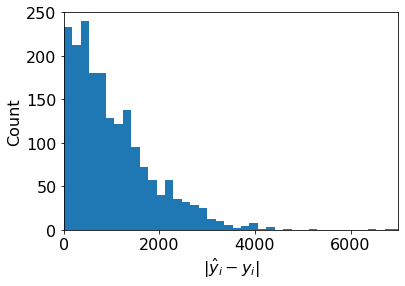

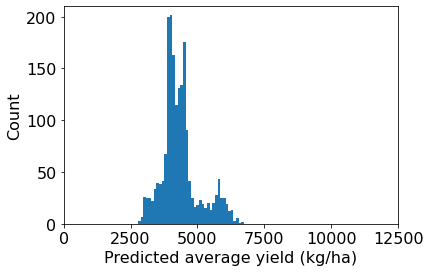

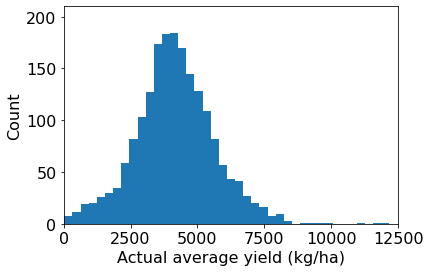

In [25]:
# distributie van de absolute differences (899 is de MAE)
plt.hist(time_test_df['abs_diff'], bins = 40)
# plt.title('Average Yield Observations 1616')
plt.xlabel('$|\hat{y}_i - y_i|$', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.xlim([0,7000])
plt.ylim([0,250])
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\distributions\dist_time_diff.png', bbox_inches='tight')
plt.show()

# distributie van de absolute differences (899 is de MAE)
plt.hist(time_test_df['Y_pred'], bins = 40)
# plt.title('Average Yield Observations 1616')
plt.xlabel('Predicted average yield (kg/ha)', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.xlim([0,12500])
plt.ylim([0,210])
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\distributions\dist_time_pred.png', bbox_inches='tight')
plt.show()

# distributie van de absolute differences (899 is de MAE)
plt.hist(time_test_df['Average Yield(Kg/Ha)'], bins = 40)
# plt.title('Average Yield Observations 1616')
plt.xlabel('Actual average yield (kg/ha)', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.xlim([0,12500])
plt.ylim([0,210])
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\distributions\dist_time_actual.png', bbox_inches='tight')
plt.show()

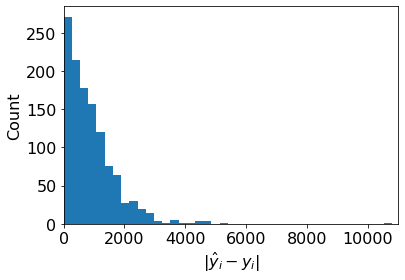

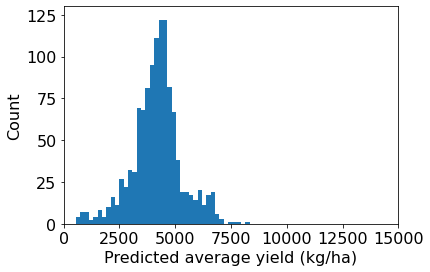

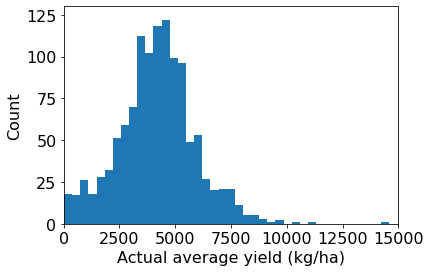

In [23]:
# distributie van de absolute differences (899 is de MAE)
plt.hist(geo_test_df['abs_diff'], bins = 40)
# plt.title('Average Yield Observations 1616')
plt.xlabel('$|\hat{y}_i - y_i|$', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.xlim([0,11000])
# plt.ylim([0,250])
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\distributions\dist_geo_diff.png', bbox_inches='tight')
plt.show()

# distributie van de absolute differences (899 is de MAE)
plt.hist(geo_test_df['Y_pred'], bins = 40)
# plt.title('Average Yield Observations 1616')
plt.xlabel('Predicted average yield (kg/ha)', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.xlim([0,15000])
plt.ylim([0,130])
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\distributions\dist_geo_pred.png', bbox_inches='tight')
plt.show()

# distributie van de absolute differences (899 is de MAE)
plt.hist(geo_test_df['Average Yield(Kg/Ha)'], bins = 40)
# plt.title('Average Yield Observations 1616')
plt.xlabel('Actual average yield (kg/ha)', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.xlim([0,15000])
plt.ylim([0,130])
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\distributions\dist_geo_actual.png', bbox_inches='tight')
plt.show()

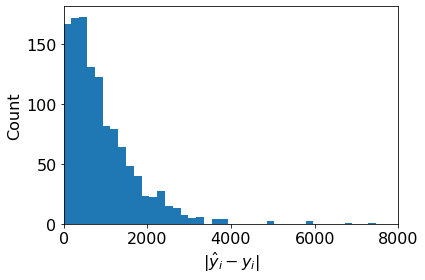

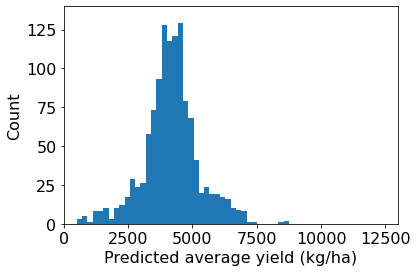

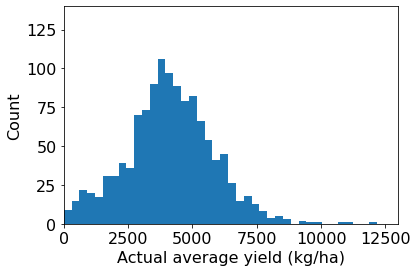

In [24]:
# distributie van de absolute differences (899 is de MAE)
plt.hist(random_test_df['abs_diff'], bins = 40)
# plt.title('Average Yield Observations 1616')
plt.xlabel('$|\hat{y}_i - y_i|$', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.xlim([0,8000])
# plt.ylim([0,250])
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\distributions\dist_random_diff.png', bbox_inches='tight')
plt.show()

# distributie van de absolute differences (899 is de MAE)
plt.hist(random_test_df['Y_pred'], bins = 40)
# plt.title('Average Yield Observations 1616')
plt.xlabel('Predicted average yield (kg/ha)', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.xlim([0,13000])
plt.ylim([0,140])
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\distributions\dist_random_pred.png', bbox_inches='tight')
plt.show()

# distributie van de absolute differences (899 is de MAE)
plt.hist(random_test_df['Average Yield(Kg/Ha)'], bins = 40)
# plt.title('Average Yield Observations 1616')
plt.xlabel('Actual average yield (kg/ha)', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.xlim([0,13000])
plt.ylim([0,140])
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\distributions\dist_random_actual.png', bbox_inches='tight')
plt.show()

## GEOGRAPHICAL MAPS DISTRIBUTIONS

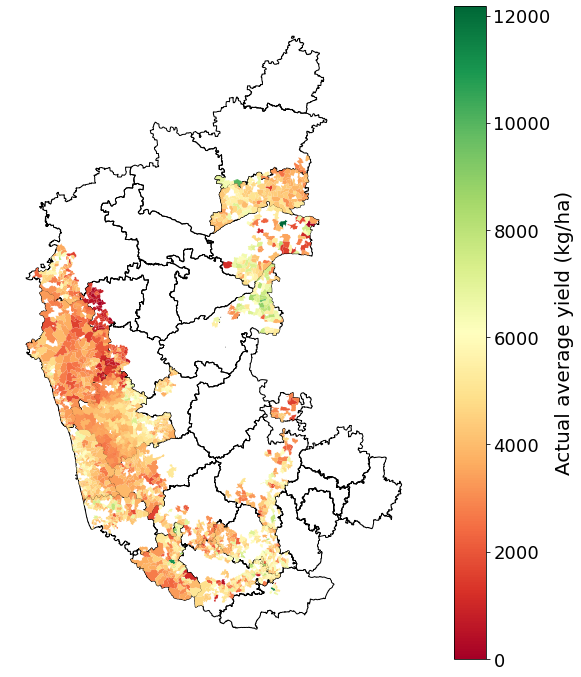

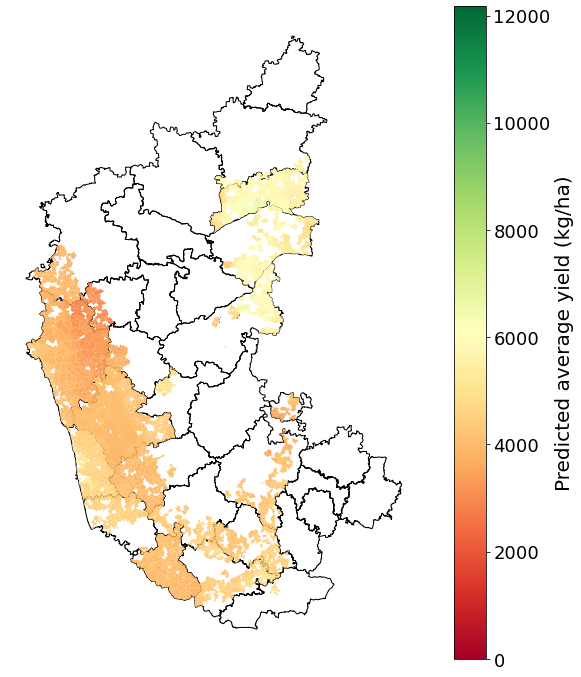

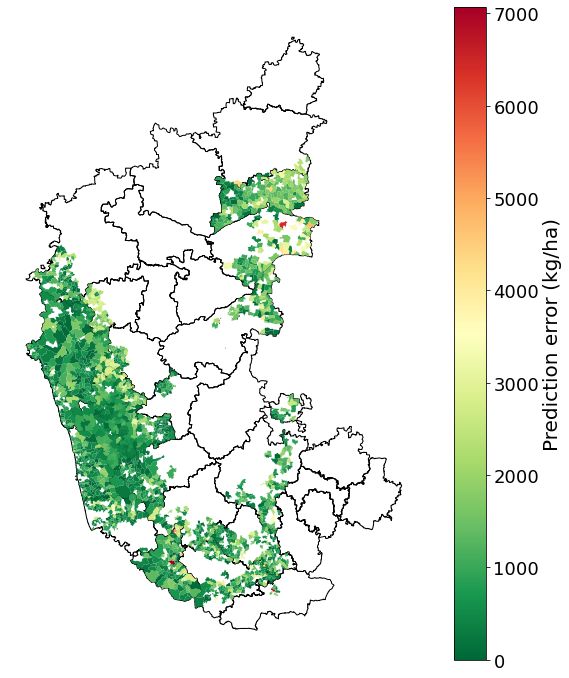

In [32]:
fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
time_test_df.plot(column = 'Average Yield(Kg/Ha)_mean',ax=ax, legend=True, vmin = 0, vmax = max(time_test_df['Average Yield(Kg/Ha)_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Actual average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\time_test_actual.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
time_test_df.plot(column = 'Y_pred_mean',ax=ax, legend=True, vmin = 0, vmax = max(time_test_df['Average Yield(Kg/Ha)_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
# time_test_df.plot(column = 'Y_pred_mean',ax=ax, legend=True, vmin = min(time_test_df['Y_pred']), vmax = max(time_test_df['Y_pred']), cmap = 'RdYlGn') 
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Predicted average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\time_test_predict.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
time_test_df.plot(column = 'abs_diff_mean',ax=ax, legend=True, vmin = 0, cmap = 'RdYlGn_r') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Prediction error (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\time_test_diff.png', bbox_inches='tight')
plt.show()

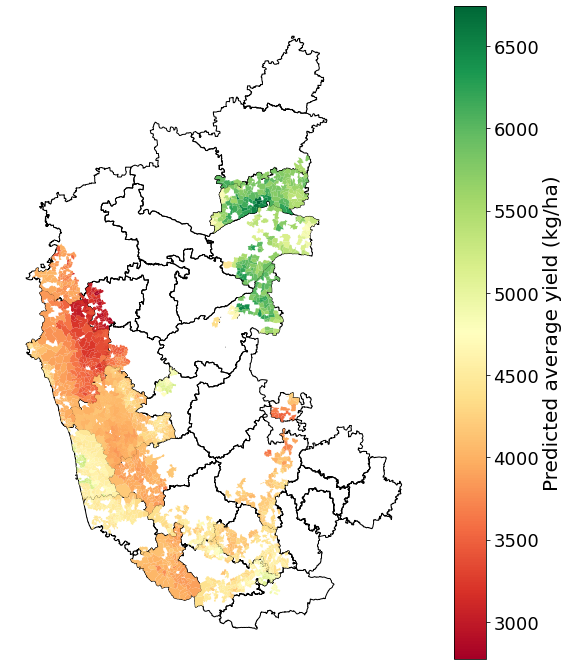

In [46]:
fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
time_test_df.plot(column = 'Y_pred_mean',ax=ax, legend=True, cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
# time_test_df.plot(column = 'Y_pred_mean',ax=ax, legend=True, vmin = min(time_test_df['Y_pred']), vmax = max(time_test_df['Y_pred']), cmap = 'RdYlGn') 
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Predicted average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\time_test_predict_zoom.png', bbox_inches='tight')
plt.show()

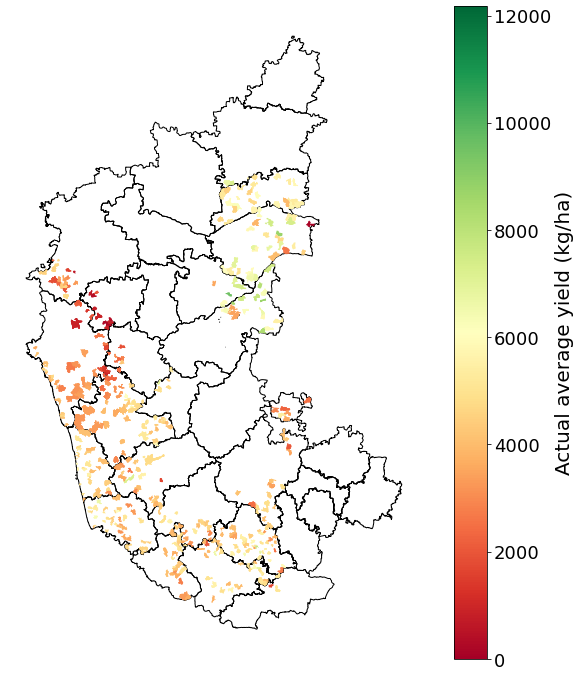

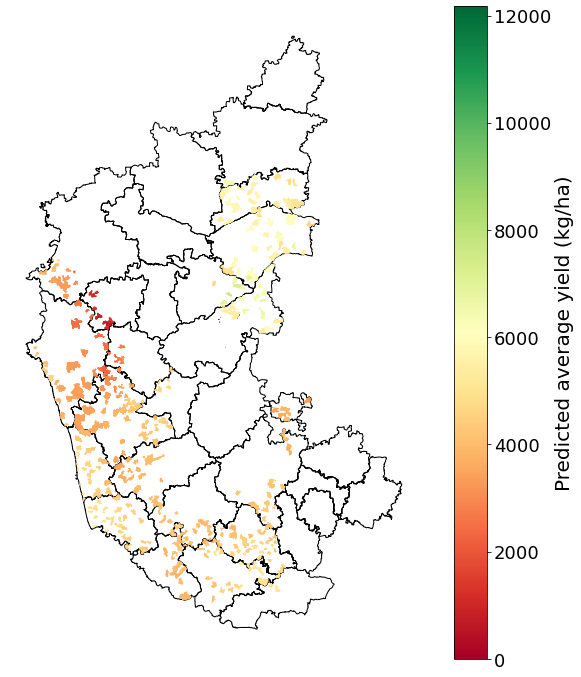

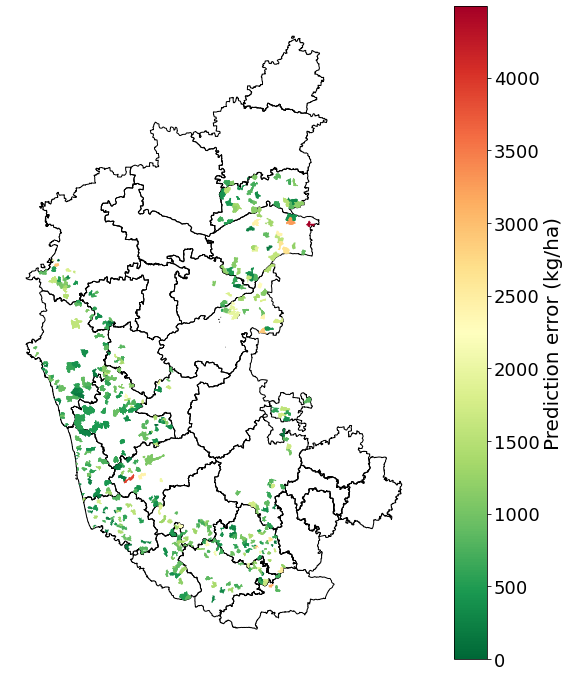

In [33]:
fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
geo_test_df.plot(column = 'Average Yield(Kg/Ha)_mean',ax=ax, legend=True, vmin = 0, vmax = max(time_test_df['Average Yield(Kg/Ha)_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Actual average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\geo_test_actual.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
geo_test_df.plot(column = 'Y_pred_mean',ax=ax, legend=True, vmin = 0, vmax = max(time_test_df['Average Yield(Kg/Ha)_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
# time_test_df.plot(column = 'Y_pred_mean',ax=ax, legend=True, vmin = min(time_test_df['Y_pred']), vmax = max(time_test_df['Y_pred']), cmap = 'RdYlGn') 
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Predicted average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\geo_test_predict.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
geo_test_df.plot(column = 'abs_diff_mean',ax=ax, legend=True, vmin = 0, cmap = 'RdYlGn_r') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Prediction error (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\geo_test_diff.png', bbox_inches='tight')
plt.show()

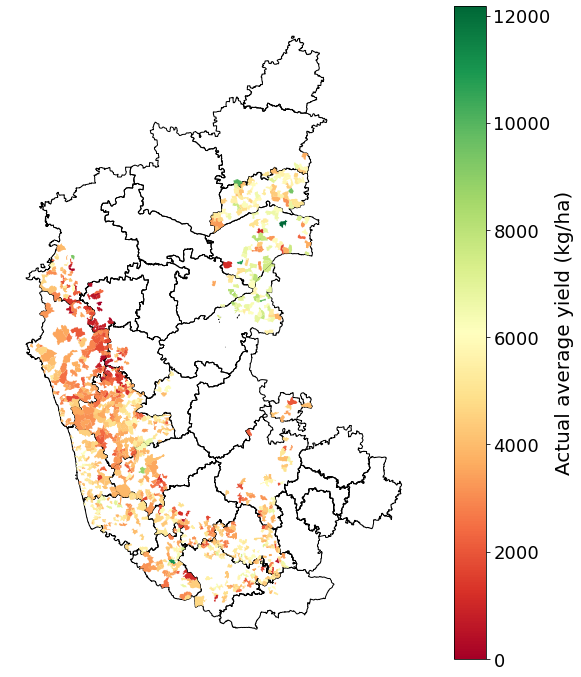

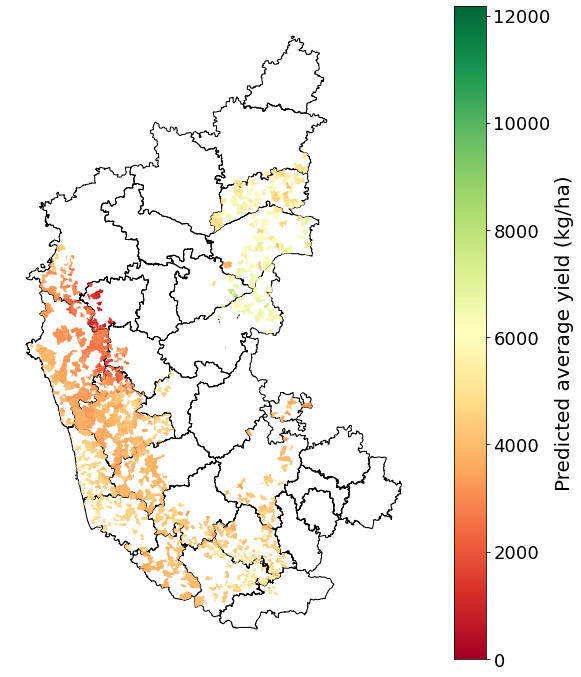

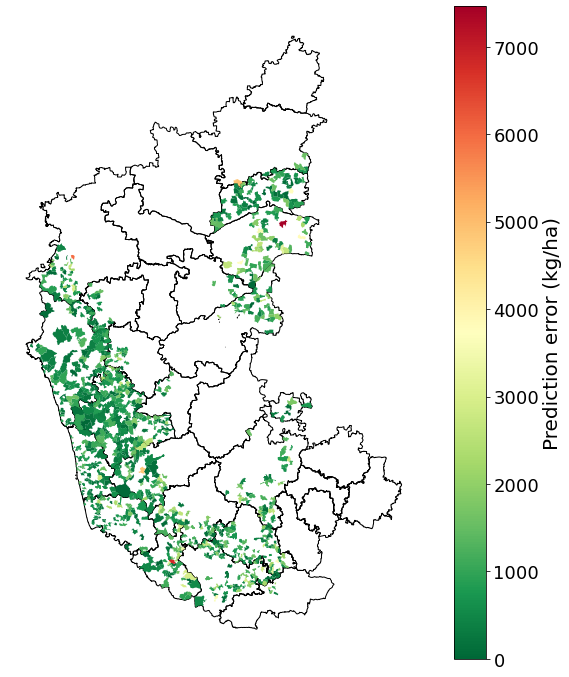

In [34]:
fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
random_test_df.plot(column = 'Average Yield(Kg/Ha)_mean',ax=ax, legend=True, vmin = 0, vmax = max(time_test_df['Average Yield(Kg/Ha)_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Actual average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\random_test_actual.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
random_test_df.plot(column = 'Y_pred_mean',ax=ax, legend=True, vmin = 0, vmax = max(time_test_df['Average Yield(Kg/Ha)_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
# time_test_df.plot(column = 'Y_pred_mean',ax=ax, legend=True, vmin = min(time_test_df['Y_pred']), vmax = max(time_test_df['Y_pred']), cmap = 'RdYlGn') 
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Predicted average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\random_test_predict.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(12,12))
Karnataka_districts.plot(ax=ax,facecolor="none")
random_test_df.plot(column = 'abs_diff_mean',ax=ax, legend=True, vmin = 0, cmap = 'RdYlGn_r') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Prediction error (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\geographic_plots\random_test_diff.png', bbox_inches='tight')
plt.show()

## MAE COMPARISON

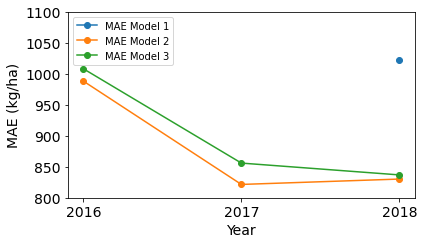

In [50]:
plt.rcParams["figure.figsize"] = [6.00, 3.50]
plt.rcParams["figure.autolayout"] = True
x = list(df_geo['Year'])
#y = [800,850,900,950,1000]
default_x_ticks = range(len(x))
#default_y_ticks = range(len(y))
plt.plot(default_x_ticks[2], np.mean(time_test_df['abs_diff']), marker="o", label='MAE Model 1')
plt.plot(default_x_ticks, df_geo['MAE'], marker="o", label='MAE Model 2')
plt.plot(default_x_ticks, df_random['MAE'], marker="o", label='MAE Model 3')
#plt.scatter(2018, np.mean(time_test_df['abs_diff']), label='MAE Model 1')

plt.xticks(default_x_ticks, x)
plt.yticks(np.arange(800, 1149, 50))
plt.tick_params(labelsize=14)
#plt.yticks(default_y_ticks, y)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('MAE (kg/ha)', fontsize = 14)
plt.legend(fontsize=10)
plt.savefig(r'D:\other_thesis\clean_sheet\files\results\general\mae_models.png', bbox_inches='tight')
plt.show()

## DATA EXPLORATION

## IRRIGATION METHOD

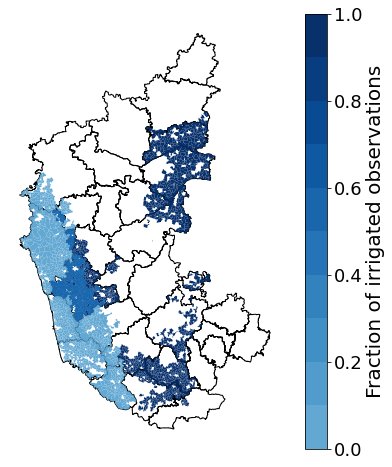

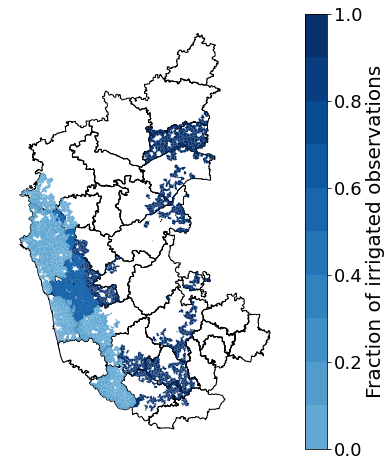

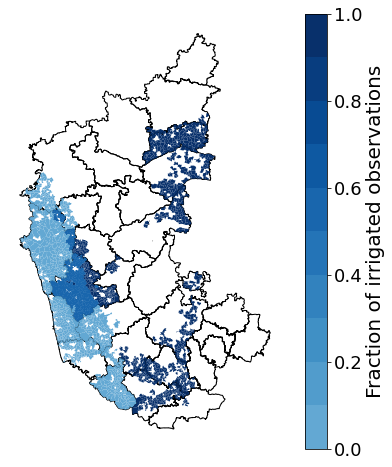

In [38]:
import matplotlib.pyplot as plt
import matplotlib        as mpl

cmap_b = mpl.cm.Blues(np.linspace(0,1,20))
cmap_b = mpl.colors.ListedColormap(cmap_b[10:,:-1])

# District yield average
# Irr/rf
fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
data_2016.plot(column = 'Irrigated_mean',ax=ax, legend=True, vmin = 0, vmax = 1, cmap = cmap_b) #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Fraction of irrigated observations',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\irr_2016.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
data_2017.plot(column = 'Irrigated_mean',ax=ax, legend=True, vmin = 0, vmax = 1, cmap =cmap_b) #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Fraction of irrigated observations',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\irr_2017.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
data_2018.plot(column = 'Irrigated_mean',ax=ax, legend=True, vmin = 0, vmax = 1, cmap = cmap_b) #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Fraction of irrigated observations',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\irr_2018.png', bbox_inches='tight')
plt.show()

## AVERAGE YIELD PER YEAR

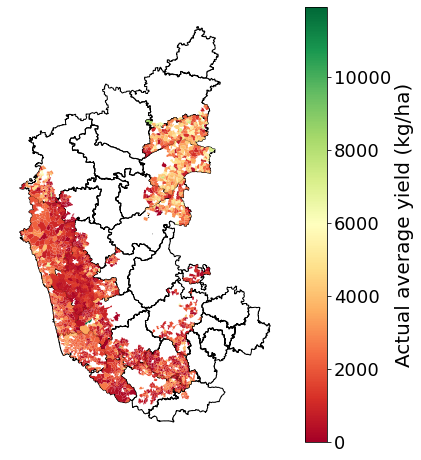

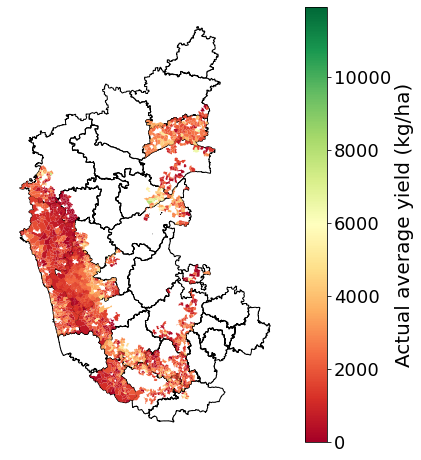

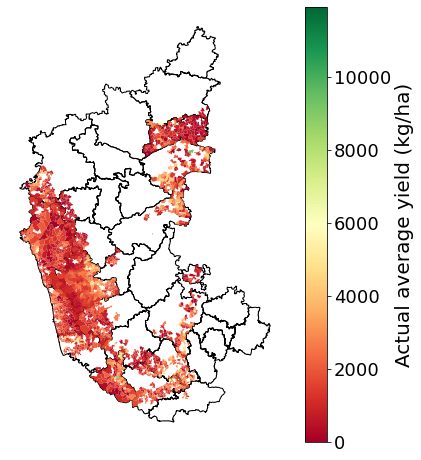

In [40]:
fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
data_2016.plot(column = 'diff_district_mean',ax=ax, legend=True, vmin = 0, vmax = max(data_2016['diff_district_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Actual average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\data_2016.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
data_2017.plot(column = 'diff_district_mean',ax=ax, legend=True, vmin = 0, vmax = max(data_2016['diff_district_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Actual average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\data_2017.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
data_2018.plot(column = 'diff_district_mean',ax=ax, legend=True, vmin = 0, vmax = max(data_2016['diff_district_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Actual average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\data_2018.png', bbox_inches='tight')
plt.show()

## NUMBER OF OBSERVATIONS PER VILLAGE

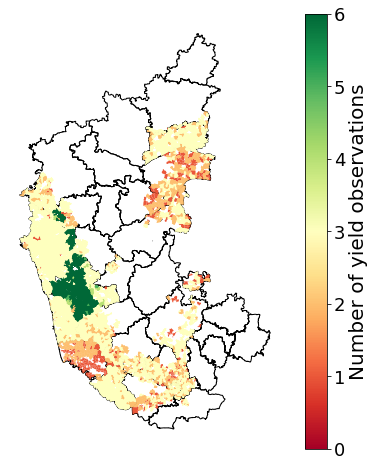

In [42]:
fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
time_df.plot(column = 'Average Yield(Kg/Ha)_count',ax=ax, legend=True, vmin = 0, vmax = max(time_df['Average Yield(Kg/Ha)_count']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Number of yield observations',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\num_obs.png', bbox_inches='tight')
plt.show()

## DIFFERENCE FROM THE PREVIOUS DISTRICT MEAN

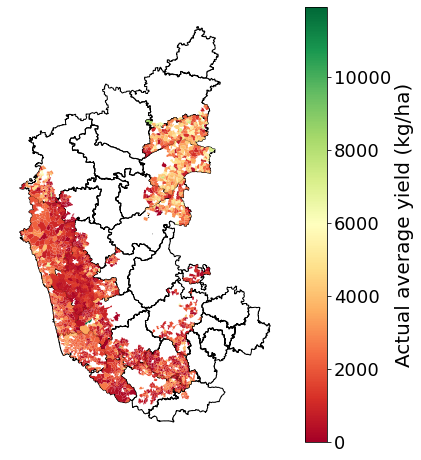

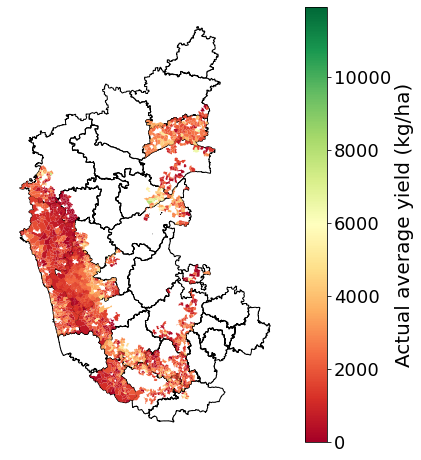

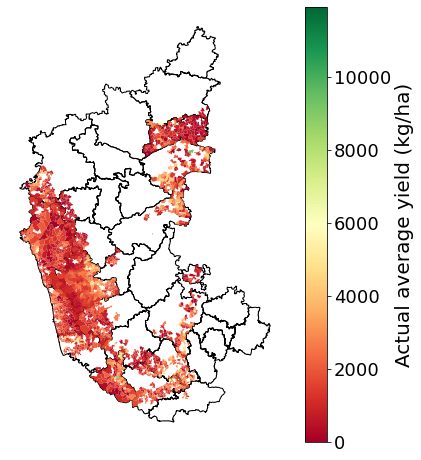

In [43]:
fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
data_2016.plot(column = 'diff_district_mean',ax=ax, legend=True, vmin = 0, vmax = max(data_2016['diff_district_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Actual average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\actual_2016.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
data_2017.plot(column = 'diff_district_mean',ax=ax, legend=True, vmin = 0, vmax = max(data_2016['diff_district_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Actual average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\actual_2017.png', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(8,8))
Karnataka_districts.plot(ax=ax,facecolor="none")
data_2018.plot(column = 'diff_district_mean',ax=ax, legend=True, vmin = 0, vmax = max(data_2016['diff_district_mean']), cmap = 'RdYlGn') #, legend_kwds = {'label': 'MAE (Kg/Ha)'}
ax.axis('off')
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=18)
#plt.legend(['MAE (Kg/Ha)'], fontsize = 30)
cb_ax.set_ylabel('Actual average yield (kg/ha)',fontsize= 20)
#ax.set_title('hello')
plt.savefig(r'D:\other_thesis\clean_sheet\files\analysis\geographic_plots\actual_2018.png', bbox_inches='tight')
plt.show()

In [45]:
data_2016['Previous District Yield(Kg/Ha)'].unique()

array([3751.5474553 ,  663.10554129, 3599.5583364 , 2676.15382228,
       2718.89828392, 3844.65081621,  304.93367368, 2740.74162851,
       1019.35301233, 2168.01075269, 2698.95704437, 3562.50458245,
       3701.19058958, 3388.65224251, 3154.00128687, 2571.65423862,
       2799.65039667, 2544.09960888, 1633.04481042, 2084.30673102])

## OBSERVATION PLOT

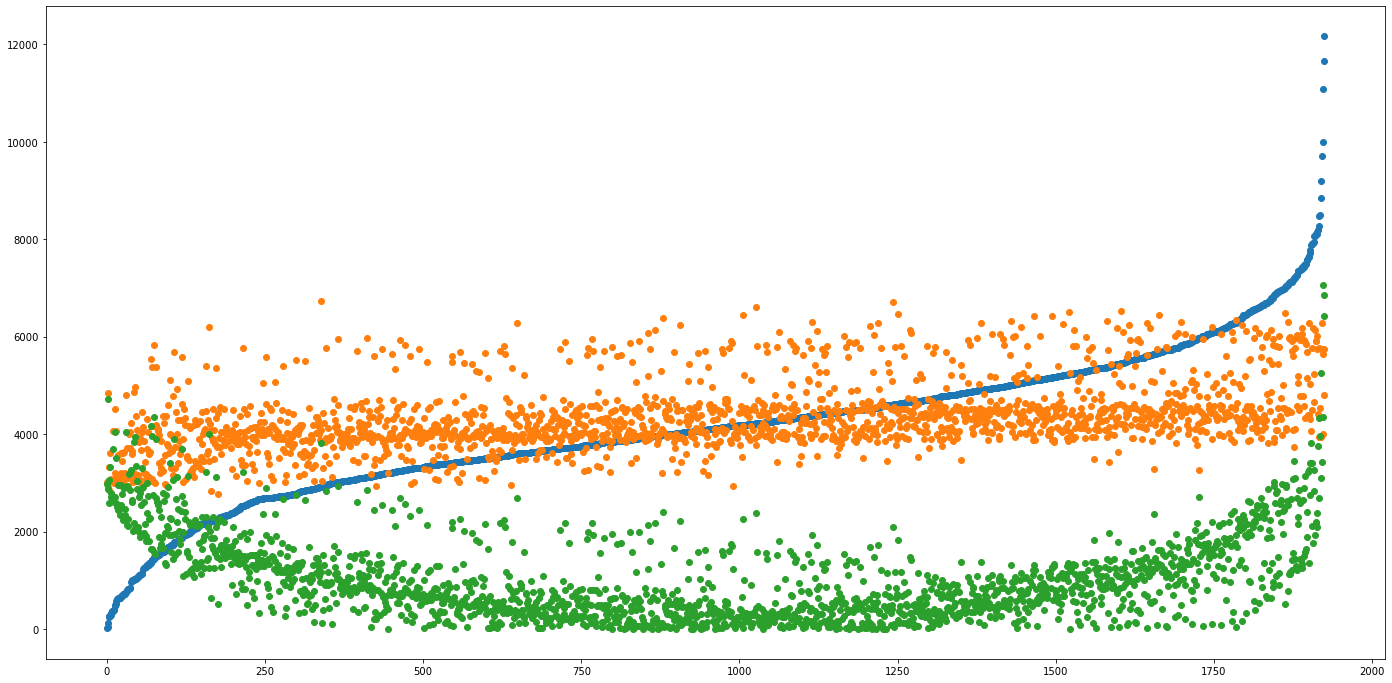

In [12]:
time_sorted = time_test_df.sort_values(['Average Yield(Kg/Ha)'], ascending = True, ignore_index=True)#['Average Yield(Kg/Ha)']

fig,ax = plt.subplots(figsize=(24,12))
plt.scatter(time_sorted.index, time_sorted['Average Yield(Kg/Ha)'])
plt.scatter(time_sorted.index, time_sorted['Y_pred'])
plt.scatter(time_sorted.index, time_sorted['abs_diff'])

(0.0, 15000.0)

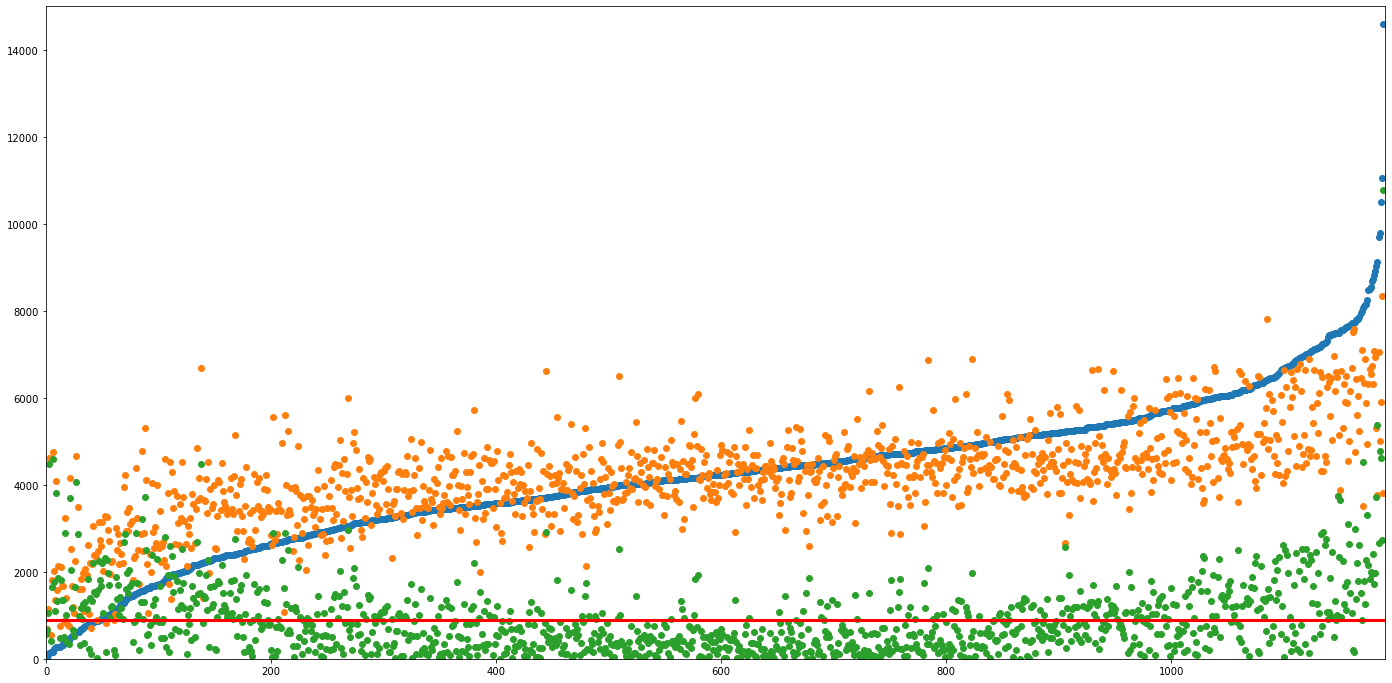

In [37]:
geo_sorted = geo_test_df.sort_values(['Average Yield(Kg/Ha)'], ascending = True, ignore_index=True)#['Average Yield(Kg/Ha)']

fig,ax = plt.subplots(figsize=(24,12))
plt.scatter(geo_sorted.index, geo_sorted['Average Yield(Kg/Ha)'])
plt.scatter(geo_sorted.index, geo_sorted['Y_pred'])
plt.scatter(geo_sorted.index, geo_sorted['abs_diff'])
plt.axhline(887, linewidth = 3, c = 'r')
plt.xlim([0,1190])
plt.ylim([0,15000])

In [48]:
five = int(np.size(geo_sorted,0)*0.01)
ninetyfive = int(np.size(geo_sorted,0)*0.99)
print(geo_sorted.loc[:five,'abs_diff'].mean()) # 1500
print(geo_sorted.loc[ninetyfive:,'abs_diff'].mean()) # 2191

1942.2256581174813
3726.8394077550224


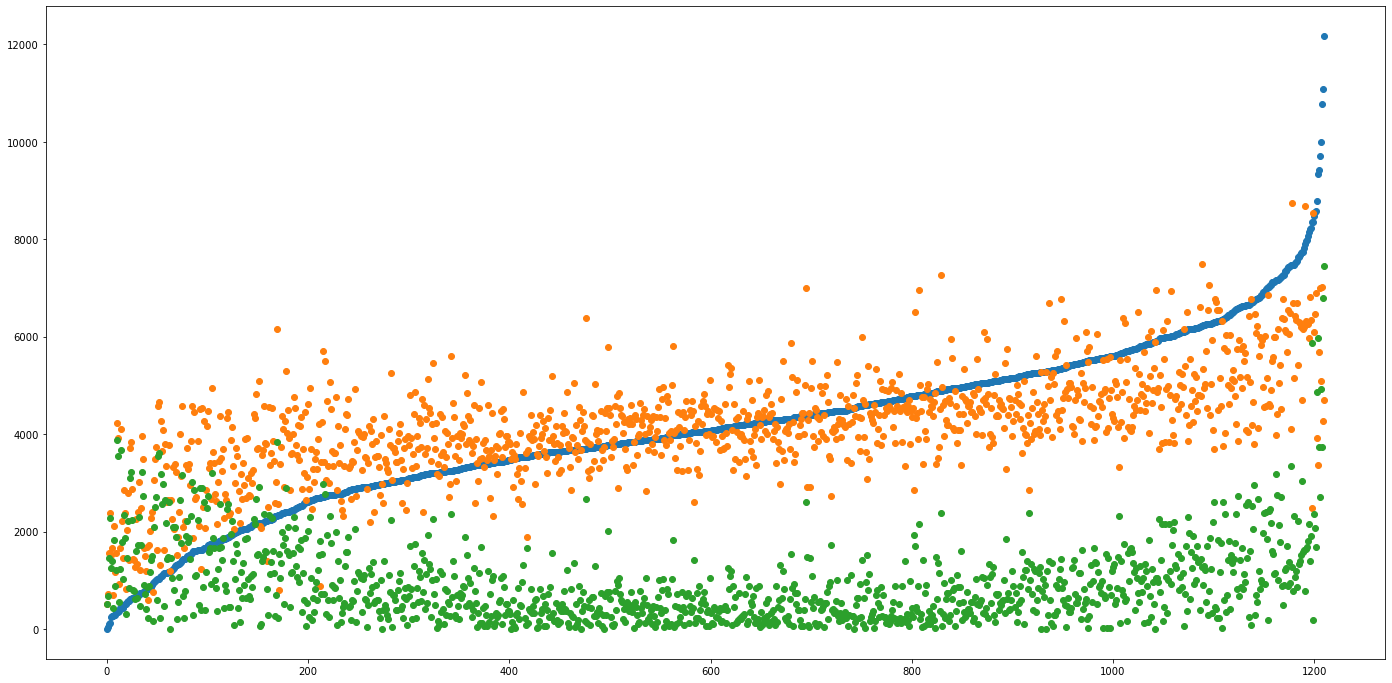

In [11]:
random_sorted = random_test_df.sort_values(['Average Yield(Kg/Ha)'], ascending = True, ignore_index=True)#['Average Yield(Kg/Ha)']

fig,ax = plt.subplots(figsize=(24,12))
plt.scatter(random_sorted.index, random_sorted['Average Yield(Kg/Ha)'])
plt.scatter(random_sorted.index, random_sorted['Y_pred'])
plt.scatter(random_sorted.index, random_sorted['abs_diff'])